# Lab 3: Gesture Recognition using Convolutional Neural Networks

This lab will be completed in two parts. In Part A you will you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

This lab will not contain starter code; all code must be developed by yourself. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/17YYMSXx0ht2-BrI55sS42L1-sRLPNx7K

## Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Ask your friend to take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.


![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early. In particular, the earlier questions can be completed even if you
do not yet have the full data set.

### 1. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

Code is shown below (comments next to the arguments explain the process of the code). My neural network architecture is 2 convolutional layers which is connected to 2 fully connected layers. 

The input are just RGB layers which are abstracted to 5 layers, and later to 15 layers (this is done to extract as much dimensional information from this dataset as possible). 

Since ReLu is the best practice activation function, I used that and I used a max pooling layer after the first convolution with a 2x2 kernel, and a stride length and 2. 



In [0]:
## IMPORT ALL OF THE NEEDED LIBRARIES IN FIRST
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

In [0]:
## DEFINE THE NEURAL NETWORK THAT WILL BE USED 
class HandNet(nn.Module): # "HandNet" object constructor
    def __init__(self): #initializes the "HandNet" class when it is called to make new objects
        super(HandNet, self).__init__() #gives access to information from the HandNet super class for the subclass
        self.name = "hand"
        self.conv1 = nn.Conv2d(1, 5, 5) #where: 3 = # of in-channels (RGB), 5 = # of output-channels, 5(X5) = convolving kernel size. Kernels are 
                                                    #applied to generate 5 220x220 feature maps per image
        self.pool = nn.MaxPool2d(2, 2) # Maxpool function where: 2 = kernel size (length and height) and stride. Kernel is applied on each 
                                       #feature map @ stride 2, to generate 5 110x110 feature maps per image
        self.conv2 = nn.Conv2d(5, 10, 5) # where: 5 = # of in-channels, 15 = # of out-channels, 5 = convolving kernel size. There are 15 (5x5) 
                                         #kernels applied on the 5 output channels of the first convolution to output 15 (53x53) feature maps
        self.fc1 = nn.Linear(10*53*53, 32) #Applies linear transform to the data, wherein: (15*53*53) = size of input sample and 32 = size of output 
        self.fc2 = nn.Linear(32, 9) #Does the same thing, where 32 = size of input and 9 is size of output (A-I)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(F.relu(x)) #Applies pooling to the Relu activation function to the 1st convolution
        x = self.pool(F.relu(self.conv2(x))) #Applies pooling to the Relu activation function to the 2nd convolution
        x = x.view(-1, 10* 53 * 53) #Flattens the images output of the second convolution to a 250 column tensor
        x = F.relu(self.fc1(x)) #Applies Relu activation to the first linear transformation (i.e. 32 depth) of the flattened tensor
        x = self.fc2(x) #Applies Relu activation to the linear transformation (i.e. 1 size) of the flattened tensor
        x = x.squeeze(1) # Flatten to [batch_size] by removing the second dimension of the tensor
        return x

handnet = HandNet() #declare HandNet as an object
print('done')

done


### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [0]:
# Trainer Helper - for analysis
def get_accuracy(model, train=True):
    if train==True:
        data_loader = train_loader
    else:
        data_loader = val_loader

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


In [0]:
# Trainer Helper - for saving data
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path
print('done')

done


In [0]:
# Training Model - For CNN Training

def train(model, data, batch_size, learning_rate, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    #val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
    
    torch.manual_seed(1) # set the random seed
    
    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss() #ideal loss function for multi-variate classification
    optimizer = optim.Adam(model.parameters(), lr=learning_rate) #advised by Prof. Colic

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
           
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            #val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1
            
        # Save the current model (checkpoint) to a file at the end of each epoch
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        print("Epoch Number: ", epoch)
        
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
   # plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    #print("Final Validation Accuracy: {}".format(val_acc[-1]))
    
    
print('done')

done


Since the classification style is multivariate (i.e. multiple potential classifications; 0-8 for A-I), I used a cross entropy function loss function. 
I initially tried using the SGD optimizer, but after seeing how low the accuracy was and from Prof. Colic's advice, I used the Adam optimizer. This is because it is newer but highly reliable for these types of problems

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [0]:
#Placed the sample images in my google drive --> must mount the drive
from google.colab import drive
drive.mount('/content/drive')

# Gathering the data of the sample test from my google drive
train_dir = '/content/drive/My Drive/Colab Notebooks/APS360/Lab 3/Sample Pics'

# classes are folders in each directory with these names
classes = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "H":7, "I":8}

# transform images to tensor --> From PyTorch data transformation documentation
data_transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), #experimenting with RGB Channels
                                  transforms.ToTensor()]) 

# load and transform data using ImageFolder --> PyTorch Image folder documentation
train_data = datasets.ImageFolder(train_dir, transform=data_transform)

# print out the data stats
print('Number of training images: ', len(train_data))

# define dataloader parameters
batch_size  = 27

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of training images:  27


In [0]:
## Looking at a sample datapoint from the training dataset
train_data[4]
## It is evident that the image loader tooks the Folder Class of A-I and converted to numbers

(tensor([[[0.6863, 0.6863, 0.6863,  ..., 0.6667, 0.6627, 0.6627],
          [0.6863, 0.6863, 0.6863,  ..., 0.6667, 0.6627, 0.6627],
          [0.6863, 0.6863, 0.6863,  ..., 0.6667, 0.6627, 0.6627],
          ...,
          [0.5961, 0.5961, 0.5961,  ..., 0.5451, 0.5451, 0.5451],
          [0.5961, 0.5961, 0.5961,  ..., 0.5451, 0.5451, 0.5451],
          [0.5961, 0.5961, 0.5961,  ..., 0.5451, 0.5451, 0.5451]]]), 1)

CUDA is available!  Training on GPU ...
Epoch Number:  0
Epoch Number:  1
Epoch Number:  2
Epoch Number:  3
Epoch Number:  4
Epoch Number:  5
Epoch Number:  6
Epoch Number:  7
Epoch Number:  8
Epoch Number:  9
Epoch Number:  10
Epoch Number:  11
Epoch Number:  12
Epoch Number:  13
Epoch Number:  14
Epoch Number:  15
Epoch Number:  16
Epoch Number:  17
Epoch Number:  18
Epoch Number:  19
Epoch Number:  20
Epoch Number:  21
Epoch Number:  22
Epoch Number:  23
Epoch Number:  24
Epoch Number:  25
Epoch Number:  26
Epoch Number:  27
Epoch Number:  28
Epoch Number:  29
Epoch Number:  30
Epoch Number:  31
Epoch Number:  32
Epoch Number:  33
Epoch Number:  34
Epoch Number:  35
Epoch Number:  36
Epoch Number:  37
Epoch Number:  38
Epoch Number:  39
Epoch Number:  40
Epoch Number:  41
Epoch Number:  42
Epoch Number:  43
Epoch Number:  44
Epoch Number:  45
Epoch Number:  46
Epoch Number:  47
Epoch Number:  48
Epoch Number:  49


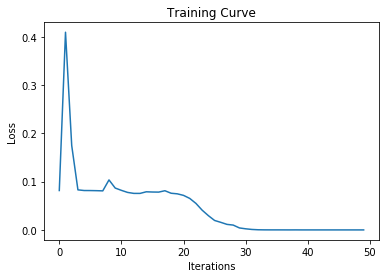

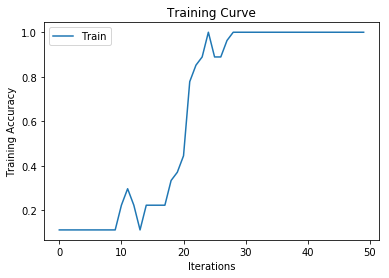

Final Training Accuracy: 1.0


In [0]:
#train model on sample data

use_cuda = True

if use_cuda and torch.cuda.is_available():
  handnet.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#Train model
train(handnet, train_data, batch_size=27, learning_rate=0.01,  num_epochs=50)

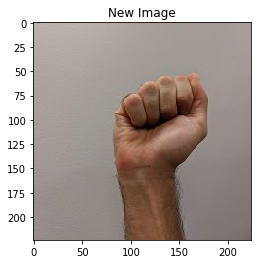

Initial Dimensions:  (224, 224, 3)
Initial Dimensions:  torch.Size([224, 224, 3])
Initial Dimensions:  torch.Size([224, 224, 1])
Updated Dimensions:  torch.Size([1, 224, 224, 1])
Updated Dimensions:  torch.Size([1, 1, 224, 224])
output dimensions:  torch.Size([1, 9])
output probabilities:  tensor([[8.4365e-01, 3.4508e-02, 2.4911e-02, 3.5128e-04, 9.2167e-02, 4.5206e-04,
         1.6923e-03, 3.3289e-04, 1.9316e-03]], grad_fn=<SoftmaxBackward>) sum:  tensor(1.0000, grad_fn=<SumBackward0>)
Predicted Output:  0 with a probability of 0.8436533212661743


In [0]:
#Testing this classifier on a random image
#plot resized image
plt.title("New Image")
img_new = plt.imread('/content/drive/My Drive/Colab Notebooks/APS360/Lab 3/Sample Pics/A/1002069851-A-3.jpg')
plt.imshow(img_new)
plt.show()


# transform images to tensor 
data_transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), #experimenting with RGB Channels
                                  transforms.ToTensor()]) 

print('Initial Dimensions: ', img_new.shape)
img_new = torch.tensor(img_new)
print('Initial Dimensions: ', img_new.shape)
img_new = img_new[0:224, 0:224,0:1]
#img_new = img_new.unsqueeze(0).type(torch.FloatTensor)
print('Initial Dimensions: ', img_new.shape)

#make our image match the model dimensions 1 x 28 x 28 and tensor type
img_new = img_new.unsqueeze(0).type(torch.FloatTensor)
#img_new = img_new.unsqueeze(0).type(torch.FloatTensor)
print('Updated Dimensions: ', img_new.shape)
img_new = img_new.transpose(1,3)
print('Updated Dimensions: ', img_new.shape)

handnet = HandNet()
out = handnet(img_new)

#perform forward pass on ANN model and generate an output
prob = F.softmax(out, dim=1)

#examine output properties
print('output dimensions: ', out.shape)
print('output probabilities: ', prob, 'sum: ', torch.sum(prob))

#print max index
print('Predicted Output: ', prob.max(1, keepdim=True)[1].item(), 'with a probability of', prob.max(1, keepdim=True)[0].item())


Image test on the untrained NN --> As per the classification index I specified: A = 0 and the model on the trained data predicted 0 (or A) with an acceptable probability of ~84.4%

### 2. Data Loading and Splitting [5 pt]

Download the anonymized data collected by you and your classmates. Split the data into training, validation,
and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) For this portion only, you are free to look up tutorials or other code on the internet to help you.

In [0]:
# USE THE TRAIN_TEST_SPLIT FUNCTION FROM SCIKIT LEARN
from sklearn.model_selection import train_test_split
import os

base_dir = '/content/drive/My Drive/Colab Notebooks/APS360/Lab_3b_Gesture_Dataset'

data = []
labels = []

for i in range(len(classes)):
  letter = classes[i]
  for filename in os.listdir(base_dir+'/'+letter):
    if filename.endswith(".jpg"): 
        # Your code comes here such as 
        #print(filename)
        data.append(filename)
        labels.append(letter)
#print(labels) #--> has 2427 images - excluding the 5 missized images
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.3, random_state=42) #create the training/preliminary validation set
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42) #create val/testing set from prelim. validation set

# NOTE: I ABANDONED THIS METHOD BECAUSE I COULD NOT FIGURE OUT WHY MY CODE GAVE ME ERRORS AND DIDN'T HAVE THE TIME TO DEBUG PRIOR TO THE DEADLINE

In [0]:
#Placed the sample images in my google drive --> must mount the drive
from google.colab import drive
drive.mount('/content/drive')

# Gathering the data of the sample test from my google drive
train_dir = '/content/drive/My Drive/Colab Notebooks/APS360/Lab 3/train1'
val_dir = '/content/drive/My Drive/Colab Notebooks/APS360/Lab 3/validation1'
test_dir = '/content/drive/My Drive/Colab Notebooks/APS360/Lab 3/test1'

# classes are folders in each directory with these names
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# transform images to tensor 
data_transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), #experimenting with RGB Channels
                                  transforms.ToTensor()]) 

# load and transform data using ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out the data stats
print('Number of validation images: ', len(val_data))
print('Number of training images: ', len(train_data))
print('Number of testing images: ', len(test_data))
# define dataloader parameters
batch_size  = 256

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of validation images:  360
Number of training images:  1705
Number of testing images:  361


In [0]:
## Looking at a sample datapoint from the full training dataset
train_data[852]
## It is evident that the image loader tooks the Folder Class of A-I and converted to numbers

(tensor([[[0.7490, 0.7490, 0.7490,  ..., 0.5451, 0.5412, 0.5373],
          [0.7490, 0.7490, 0.7490,  ..., 0.5490, 0.5412, 0.5373],
          [0.7490, 0.7490, 0.7490,  ..., 0.5529, 0.5451, 0.5412],
          ...,
          [0.7608, 0.7608, 0.7608,  ..., 0.6275, 0.6235, 0.6235],
          [0.7608, 0.7608, 0.7608,  ..., 0.6235, 0.6235, 0.6235],
          [0.7569, 0.7608, 0.7608,  ..., 0.6235, 0.6235, 0.6196]]]), 4)

Process of Data Loading/Splitting is described below:

Step 1: removal of the "unclean" or mis-sized data (listed: 32_F_3.jpg - 845x845, 43_F_2.jpg - 223x223, 88_F_3.jpg - 250x333, 24_G_2.jpg - 224x214, 19_H_1.jpg - 223x224.)

Step 2: I spent a couple of hours experimenting a few different methods to create the train/testing set. I initially tried the image loader method from PyTorch, however it was not able to get the feature classifications (i.e. whether the sign was A, B, etc.). Another method I tried was to use the SciKit Learn's train-test-split functionality to create labels/image name lists. However, that also proved to be ineffective. Seeing that within the 2 hours I spent researching, I could have manually done this (though it is an inelegant solution), I chose to split the data manually. 

Step 3: I split the data 70%, 15%, 15% for train/val/test, respectively. I split the data into 3 folders each with the A-I folder categorizations. The final image results were 1705, 360 and 361 for train, validation, and test, respectively. Each of the letters had approximately the same number of images as well (~269 - 274). Initially my neural network used the RGB values for the parametrization. After seeing how long it took for these iterations to run (because of the computational expense per picture), I reduced the dimensionality to become black and white, since the coloration of the images do not play a role in determining whether the hand sign is an A, B, etc. 

### 3. Training [5 pt]

Train your first network on your training set. Plot the training curve, and include your plot in your writeup.
Make sure that you are checkpointing frequently!

Made modification to the train function to include the validation portion as well

CUDA is available!  Training on GPU ...
Epoch Number:  0
Epoch Number:  1
Epoch Number:  2
Epoch Number:  3
Epoch Number:  4
Epoch Number:  5
Epoch Number:  6
Epoch Number:  7
Epoch Number:  8
Epoch Number:  9
Epoch Number:  10
Epoch Number:  11
Epoch Number:  12
Epoch Number:  13
Epoch Number:  14
Epoch Number:  15
Epoch Number:  16
Epoch Number:  17
Epoch Number:  18
Epoch Number:  19
Epoch Number:  20
Epoch Number:  21
Epoch Number:  22
Epoch Number:  23
Epoch Number:  24
Epoch Number:  25
Epoch Number:  26
Epoch Number:  27
Epoch Number:  28
Epoch Number:  29


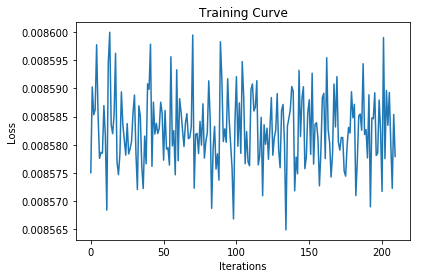

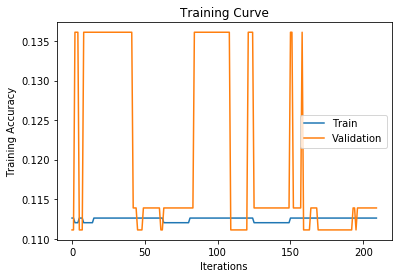

Final Training Accuracy: 0.1126099706744868
Final Validation Accuracy: 0.11388888888888889


In [0]:
#train model on sample data

use_cuda = True

if use_cuda and torch.cuda.is_available():
  handnet.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#Train model
train(handnet, train_data,  batch_size, learning_rate=0.01, num_epochs=30)

### 4. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

The 3 most effective hyperparameter tuning options are: Batch size, learning rate, and number of layers/hidden units. Epochs could also help in this as well, given the very large nature of the dataset but I believe the first 3 are more impactful

If the batch size/learning rate are changed, overfitting could be reduced which in turn could reduce overfitting. That in turn can increase accuracy

If the number of layers are changed (either reduced or increased), can effect the dimensionality of the network and make it less computationally expensive to run through iterations.

### Part (b) - 6 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

Epoch Number:  0
Epoch Number:  1
Epoch Number:  2
Epoch Number:  3
Epoch Number:  4
Epoch Number:  5
Epoch Number:  6
Epoch Number:  7
Epoch Number:  8
Epoch Number:  9
Epoch Number:  10
Epoch Number:  11
Epoch Number:  12
Epoch Number:  13
Epoch Number:  14
Epoch Number:  15
Epoch Number:  16
Epoch Number:  17
Epoch Number:  18
Epoch Number:  19
Epoch Number:  20
Epoch Number:  21
Epoch Number:  22
Epoch Number:  23
Epoch Number:  24
Epoch Number:  25
Epoch Number:  26
Epoch Number:  27
Epoch Number:  28
Epoch Number:  29


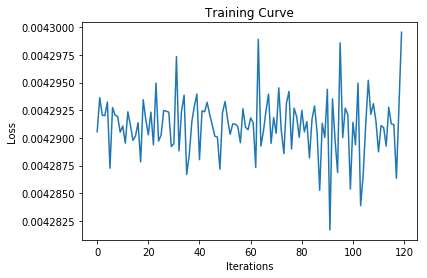

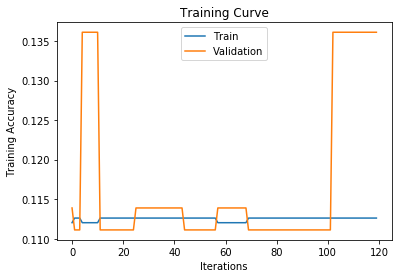

Final Training Accuracy: 0.1126099706744868
Final Validation Accuracy: 0.1361111111111111


In [0]:
## Modification to the batch size (2x what it was originally)
batch_size = 512
train(handnet, train_data,  batch_size, learning_rate=0.01, num_epochs=30)

Epoch Number:  0
Epoch Number:  1
Epoch Number:  2
Epoch Number:  3
Epoch Number:  4
Epoch Number:  5
Epoch Number:  6
Epoch Number:  7
Epoch Number:  8
Epoch Number:  9
Epoch Number:  10
Epoch Number:  11
Epoch Number:  12
Epoch Number:  13
Epoch Number:  14
Epoch Number:  15
Epoch Number:  16
Epoch Number:  17
Epoch Number:  18
Epoch Number:  19
Epoch Number:  20
Epoch Number:  21
Epoch Number:  22
Epoch Number:  23
Epoch Number:  24
Epoch Number:  25
Epoch Number:  26
Epoch Number:  27
Epoch Number:  28
Epoch Number:  29


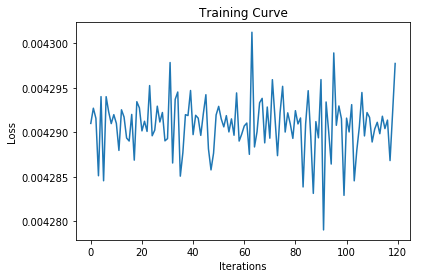

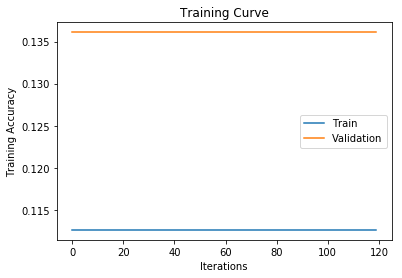

Final Training Accuracy: 0.1126099706744868
Final Validation Accuracy: 0.1361111111111111


In [0]:
## Same batch size of 512 (2x the original value), with a learning rate of 0.001
train(handnet, train_data,  batch_size, learning_rate=0.001, num_epochs=30)

CUDA is available!  Training on GPU ...
Epoch Number:  0
Epoch Number:  1
Epoch Number:  2
Epoch Number:  3
Epoch Number:  4
Epoch Number:  5
Epoch Number:  6
Epoch Number:  7
Epoch Number:  8
Epoch Number:  9
Epoch Number:  10
Epoch Number:  11
Epoch Number:  12
Epoch Number:  13
Epoch Number:  14
Epoch Number:  15
Epoch Number:  16
Epoch Number:  17
Epoch Number:  18
Epoch Number:  19
Epoch Number:  20
Epoch Number:  21
Epoch Number:  22
Epoch Number:  23
Epoch Number:  24
Epoch Number:  25
Epoch Number:  26
Epoch Number:  27
Epoch Number:  28
Epoch Number:  29


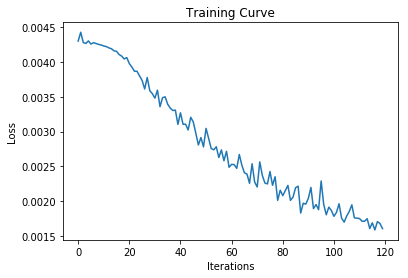

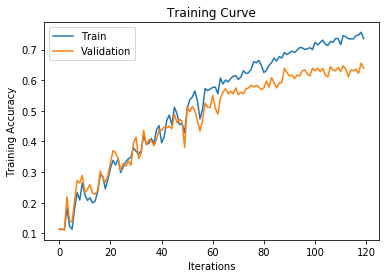

Final Training Accuracy: 0.7360703812316716
Final Validation Accuracy: 0.6388888888888888


In [0]:
## NEW CNN - Same batch size of 512 (2x the original value), with a learning rate of 0.001 and a 3rd fully connected layer

class HandNet2(nn.Module): # "HandNet" object constructor
    def __init__(self): #initializes the "HandNet" class when it is called to make new objects
        super(HandNet2, self).__init__() #gives access to information from the HandNet super class for the subclass
        self.name = "hand2"
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(3, 10, 5) 
        self.fc1 = nn.Linear(10*53*53, 80) #Applies linear transform to the data, wherein: (15*53*53) = size of input sample and 32 = size of output 
        self.fc2 = nn.Linear(80, 32) ## ADDED A NEW FULLY CONNECTED LAYER
        self.fc3 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.conv1(x)  
        x = self.pool(F.relu(x)) #Applies pooling to the Relu activation function to the 1st convolution
        x = self.pool(F.relu(self.conv2(x))) #Applies pooling to the Relu activation function to the 2nd convolution
        x = x.view(-1, 10* 53 * 53) #Flattens the images output of the second convolution to a 250 column tensor
        x = F.relu(self.fc1(x)) #Applies Relu activation to the first linear transformation (i.e. 32 depth) of the flattened tensor
        x = self.fc2(x)
        x = self.fc3(x)#Applies Relu activation to the linear transformation (i.e. 1 size) of the flattened tensor
        x = x.squeeze(1) # Flatten to [batch_size] by removing the second dimensino of the tensor
        return x
handnet2 = HandNet2()

use_cuda = True

if use_cuda and torch.cuda.is_available():
  handnet2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(handnet2, train_data,  batch_size, learning_rate=0.001, num_epochs=30)

The additional layer was successful in increasing the accuracy by ~6x. 
Hypothesis: the learning rate of 0.001 is a little too low (with the number of epochs set as 30) which means the global minimum of the error values are not attained

CUDA is available!  Training on GPU ...
Epoch Number:  0
Epoch Number:  1
Epoch Number:  2
Epoch Number:  3
Epoch Number:  4
Epoch Number:  5
Epoch Number:  6
Epoch Number:  7
Epoch Number:  8
Epoch Number:  9
Epoch Number:  10
Epoch Number:  11
Epoch Number:  12
Epoch Number:  13
Epoch Number:  14
Epoch Number:  15
Epoch Number:  16
Epoch Number:  17
Epoch Number:  18
Epoch Number:  19
Epoch Number:  20
Epoch Number:  21
Epoch Number:  22
Epoch Number:  23
Epoch Number:  24
Epoch Number:  25
Epoch Number:  26
Epoch Number:  27
Epoch Number:  28
Epoch Number:  29


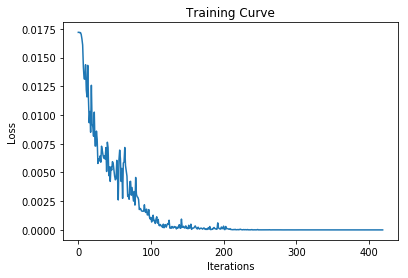

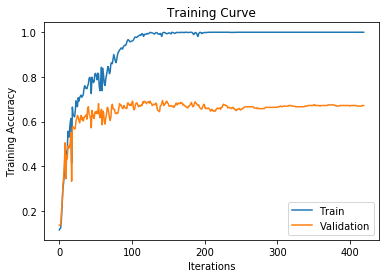

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6722222222222223


In [0]:
## Cut the batch size to 128 (smaller than the original value), and increased the previous lr to 0.005 and add the 3rd layer. 

use_cuda = True

if use_cuda and torch.cuda.is_available():
  handnet2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(handnet2, train_data,  batch_size=128, learning_rate=0.005, num_epochs=30)

### Part (c) - 1 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

The best model was the version trained in modification number 3.

This is because the training/validaiton accuracy increased fairly linearly together, and did not diverge until a high number of iterations. This shows that the model is precise for both the training/validation sets and is not prone to overfitting. Though the 4th one did have a higher validaiton accuracy, there was significant overfitting as the loss diminished to zero. This shows that the model likely will not hold up well to the scrutiny of the test set. The accuracies of the training and validation were: 73.6% and 63.9% , respectively. 

The parameters for the model were as follows:
- Batch Size: 256
- CNN conditions: 1 max pool, 2 convolutional layers and 3 fully connected layers
- Learning rate: 0.001
- Epoch Number: 30

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once.

CUDA is available!  Training on GPU ...
Epoch Number:  0
Epoch Number:  1
Epoch Number:  2
Epoch Number:  3
Epoch Number:  4
Epoch Number:  5
Epoch Number:  6
Epoch Number:  7
Epoch Number:  8
Epoch Number:  9
Epoch Number:  10
Epoch Number:  11
Epoch Number:  12
Epoch Number:  13
Epoch Number:  14
Epoch Number:  15
Epoch Number:  16
Epoch Number:  17
Epoch Number:  18
Epoch Number:  19
Epoch Number:  20
Epoch Number:  21
Epoch Number:  22
Epoch Number:  23
Epoch Number:  24
Epoch Number:  25
Epoch Number:  26
Epoch Number:  27
Epoch Number:  28
Epoch Number:  29


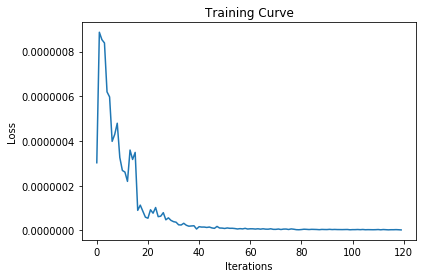

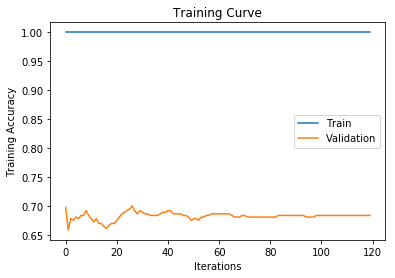

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6833333333333333


In [0]:
#Testing Set
use_cuda = True

if use_cuda and torch.cuda.is_available():
  handnet2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(handnet2, test_data,  batch_size=512, learning_rate=0.001, num_epochs=30)